## 카운트 벡터화(CountVectorizer)
- BOW의 Feature Vectorizer 에는 CountVectorizer 와 TF-IDF(Term Frequency - Inverse Documnet Frequency)가 있다.
- Word Feature에 값을 부여할 때, 각 텍스트에서 단어가 나타나는 횟수(Count)를 부여하는 경우를 카운트 벡터화(Count Vectorizer)라고 한다. 
- sklearn의 CountVectorizer 클래스를 활용하여 적용할 수 있다.

In [1]:
# nltk library baseline
import nltk
nltk.download('stopwords')# for Stop word
nltk.download('punkt')# for Tokenize
nltk.download('wordnet')# for Lemmatization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

s1 = ['You know that I want your love. bacause I love you']

vector = CountVectorizer()

print(vector.fit_transform(s1).toarray())
print(vector.vocabulary_)

[[1 1 2 1 1 2 1]]
{'you': 5, 'know': 1, 'that': 3, 'want': 4, 'your': 6, 'love': 2, 'bacause': 0}


### BOW + Stop Words

In [6]:
s2 = ["Family is not an important thing. It's everything"]

vector2 = CountVectorizer(stop_words=['is', 'not', 'an', 'it', "is" ])

print(vector2.fit_transform(s2).toarray())
print(vector2.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


In [7]:
s2 = ["Family is not an important thing. It's everything"]

vector2 = CountVectorizer(stop_words='english')

print(vector2.fit_transform(s2).toarray())
print(vector2.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


In [8]:
# 이상 CountVectorizer

## TF-IDF ( Term Frequency - Inverse Document Frequency )
+ 위의 카운트 기반 벡터화는 단어의 빈도수가 높으면, 그 단어가 중요하다고 평가한다. 하지만 불용어들이 자주 등장하는 단어들이므로, 이에 따라 중요하다고 평가받을 수 있다.
+ 이 문제를 보완하기 위해 TF-IDF 벡터화를 사용한다.
+ TF-IDF는 자주 등장하는 단어에 높은 가중치를 주되, 모든 텍스트에서 자주 등장하는 단어에는 패널티를 부여한다. 특정 텍스트에서만 자주 등장하는 단어에 높은 가중치를 주는 방식이다.
+ 특정 텍스트에서만 자주 등장하는 단어에 높은 가중치를 부여 받으므로, 해당 텍스트에서 그 단어가 실질적으로 중요한지 판단할 수 있다.
+ 일반적으로 문서의 양이 많을 때에는, 카운트벡터화보다 TF-IDF 방식을 많이 사용한다.

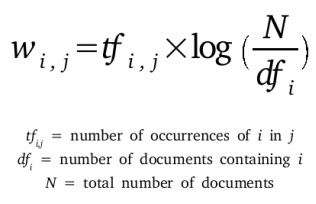

- tf(i,j) 는 카운트 벡터화 식을 의미한다. ( i ~ j 구간에서 특정 단어가 얼마나 나타났는지를 의미 )
- df_i 는 특정단어 i를 포함하는 문서의 개수를 의미한다.
- 하지만 여기에 log(N/df_i)를 곱하면 N은 문장의 길이로 처음에 주어진 상수와 같아서, df_i가 증가할수록, log(N/df_i)는 감소한다.
- 즉, 이 부분에서 df_i가 많다는 것은, 많은 문서에서 i를 많이 쓴다는 것이고, 이를 log의 분모에 넣어서 df_i가 커질수록 해당 부분에 대해 패널티를 부여하게 된다.


In [9]:
# TF IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [10]:
# 카운트 벡터화
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
